In [79]:
#imports
import pandas as pd
import numpy as np
import math as mat
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import tensorflow as tf
import statsmodels.api as sm


In [80]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Houses/raw_house_data.csv')


In [81]:
data['garage'].replace('None', np.nan, inplace=True)
data['bathrooms'].replace('None', np.nan, inplace=True)
data['sqrt_ft'].replace('None', np.nan, inplace=True)
data['HOA'].replace('None', np.nan, inplace=True)
data['floor_covering'].replace('None', np.nan, inplace=True)
data['sold_price'].replace('None', np.nan, inplace=True)
data.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8,12025,4,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8,8921,4,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7,5238,3,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6,6480,3,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67


In [82]:
data["sqrt_ft"] = data.sqrt_ft.astype(float)
data["bathrooms"] = data.bathrooms.astype(float)
data["year_built"] = data.year_built.astype(int)
data["garage"] = data.garage.astype(float)
data['HOA'] = data['HOA'].replace(',','', regex=True)
data["HOA"] = data.HOA.astype(float)

In [83]:
data.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [84]:
data['HOA'] = data['HOA'].fillna(data['HOA'].median())
data['sqrt_ft'] = data['sqrt_ft'].fillna(data['sqrt_ft'].median())
data.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft              0
garage               7
kitchen_features     0
fireplaces          25
floor_covering       1
HOA                  0
dtype: int64

In [85]:
df = data

In [86]:
df = df.dropna()

In [87]:
df['year_built'].min()

0

In [88]:
df= df[df['year_built'] != 0]

In [89]:
df['year_built'].min()


1893

In [90]:
df['year_built'].max()

2019

###We create 4 categories base on the marketing for houses

In [91]:
dfA = df[df['year_built'] >= 2007]
dfA.shape

(1021, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d8c0720d0>,
      dtype=object)

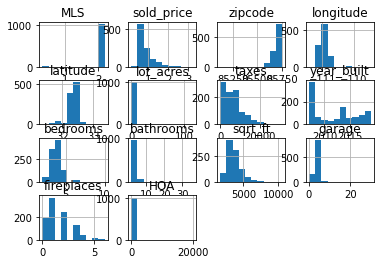

In [92]:
dfA.hist()

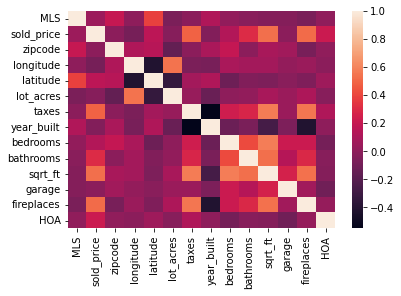

In [93]:
sns.heatmap(dfA.corr())

In [94]:
test = dfA.loc(axis=1)['sold_price','taxes','sqrt_ft']

In [95]:
test.dtypes

sold_price    float64
taxes         float64
sqrt_ft       float64
dtype: object

In [96]:
# Shuffle your dataset 
shuffle_df = test.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(test))

# Split your dataset 
train_datar = shuffle_df[:train_size]
test_datar = shuffle_df[train_size:]

In [97]:
train_datar = train_datar.to_numpy()
test_datar = test_datar.to_numpy()

In [98]:
x,y = train_datar[:,1:],train_datar[:,0]
xt, yt = test_datar[:,1:], test_datar[:,0]

In [99]:
x.shape

(714, 2)

In [100]:
model = sm.OLS(y,x)
results = model.fit()

In [101]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.886
Model:                            OLS   Adj. R-squared (uncentered):              0.886
Method:                 Least Squares   F-statistic:                              2776.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                        0.00
Time:                        03:54:36   Log-Likelihood:                         -10073.
No. Observations:                 714   AIC:                                  2.015e+04
Df Residuals:                     712   BIC:                                  2.016e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [102]:
Pricepersqrtf = df['sold_price']/df['sqrt_ft']
Pricepersqrtf

0       504.761905
1       575.342466
3       498.946668
4       533.372420
5       475.007308
           ...    
4994    254.036087
4995    137.461816
4996    237.273512
4997    268.058691
4998    147.690655
Length: 4961, dtype: float64

In [103]:
taxesperm = df['taxes']/12
taxesperm

0        439.333333
1        868.530000
3        701.548333
4       1282.750000
5       2316.903333
           ...     
4994     367.833333
4995     168.083333
4996     401.834167
4997      83.333333
4998     485.244167
Name: taxes, Length: 4961, dtype: float64

taxes per month, number of rooms, +- score and recomendations

In [104]:
df['Pricesqrt'] = Pricepersqrtf

In [105]:
df['Pricesqrt'].nunique()

4816

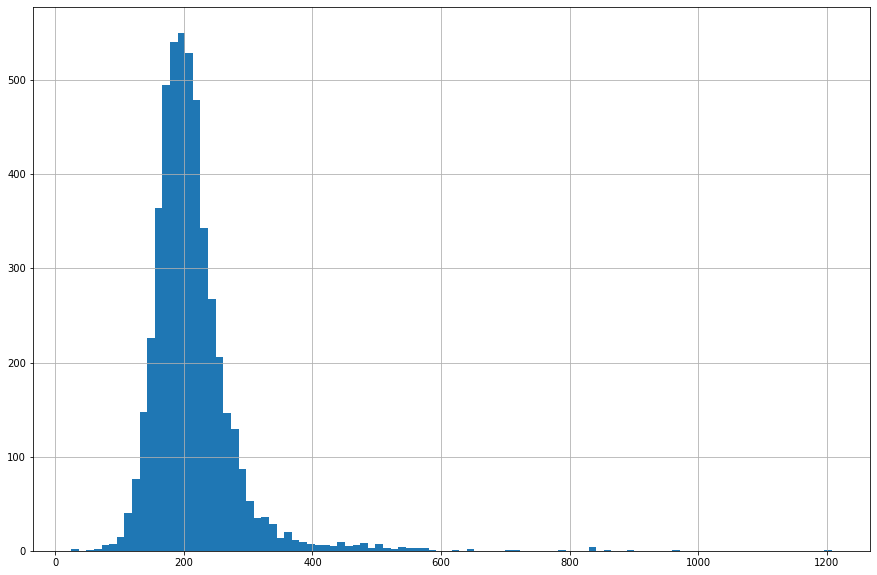

In [106]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()

df['Pricesqrt'].hist(ax=ax,bins=100)

In [107]:
def transform(x):
  if x >= 0 and x <=150:
    return 1
  if x >=151 and x <=250:
    return 2
  if x >= 251 and x <=350:
    return 3
  if x >= 351 and x <= 450:
    return 4
  if x >= 451:
    return 5



In [108]:
def transform(x):
  if x >= 0 and x <=150:
    return 1
  if x >=151 and x <=250:
    return 2
  if x >= 251 and x <=350:
    return 3
  if x >= 351:
    return 4



In [109]:
df["Pricesqrt"] = df['Pricesqrt'].map(transform)

In [110]:
class KNNClassifier():
  def fit(self, X, y):
    self.X = X
    self.y =y.astype(int)
  def predict(self,X, k, epsilon=1e-4):
    N = len(X)
    y_hat = np.zeros(N)
    
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2,axis=1)
      idxt = np.argsort(dist2)[:k]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights =gamma_k).argmax()
    return y_hat

In [111]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)


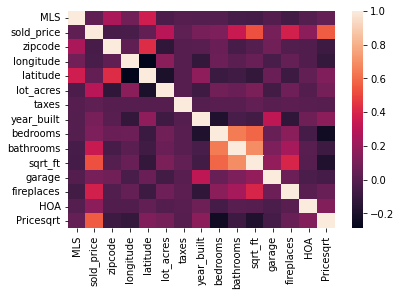

In [112]:
sns.heatmap(df.corr())

In [113]:
datclass = df.loc[:,['longitude','latitude','Pricesqrt','bathrooms','bedrooms']]
datclass.isna().sum()


longitude     0
latitude      0
Pricesqrt    36
bathrooms     0
bedrooms      0
dtype: int64

In [114]:
datclass = datclass.dropna()

In [115]:
datclass.isna().sum()

longitude    0
latitude     0
Pricesqrt    0
bathrooms    0
bedrooms     0
dtype: int64

In [116]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

In [117]:
datclass['coor'] = datclass.apply(lambda x: single_pt_haversine(lat = x['latitude'], lng = x['longitude']), axis=1)

In [118]:
datclass['coor'].head()

0    11931.100535
1    11988.050359
3    11986.037832
4    11951.394495
5    11959.113631
Name: coor, dtype: float64

In [119]:
datclass = datclass.loc[:,['coor','bedrooms','bathrooms','Pricesqrt']]

In [120]:
def absolute_maximum_scale(series):
    return series / series.abs().max()
  

In [121]:
datclass['coor'] = (datclass['coor']-datclass['coor'].min())/(datclass['coor'].max()-datclass['coor'].min())

In [122]:
# Shuffle your dataset 
shuffle_df = datclass.sample(frac=1)

# Define a size for your train set 
train_size = int(0.9 * len(datclass))

# Split your dataset 
train_dataknn = shuffle_df[:train_size]
test_dataknn = shuffle_df[train_size:]

In [123]:
train_dataknn = train_dataknn.to_numpy()
test_dataknn = test_dataknn.to_numpy()

In [124]:
train_dataknn


array([[0.55906289, 5.        , 4.        , 2.        ],
       [0.68101563, 4.        , 3.        , 2.        ],
       [0.59895059, 3.        , 3.        , 2.        ],
       ...,
       [0.60613837, 3.        , 3.        , 3.        ],
       [0.60217234, 5.        , 3.        , 2.        ],
       [0.56994026, 3.        , 3.        , 2.        ]])

In [125]:
x = train_dataknn[:,:3]
y =  train_dataknn[:,-1]

In [126]:
xtest= test_dataknn[:,:3] 
ytest = test_dataknn[:,-1]

In [127]:
modelknn = KNNClassifier()

In [128]:
modelknn.fit(x,y)

In [129]:
y_hat = modelknn.predict(xtest,20)


In [131]:
accuracy(ytest,y_hat)

0.7647058823529411

In [132]:
unique, counts = np.unique(y_hat, return_counts=True)

result = np.column_stack((unique, counts)) 
print (result.round(2))

[[  1.   7.]
 [  2. 467.]
 [  3.  13.]
 [  4.   6.]]


###Price for Airbnb

For this section, it was estimated the possible price base on quantity of bedroom and the area where they are found 

In [137]:
gendat = datclass.to_numpy()
xknn = gendat[:,:3]
xknn

array([[ 0.4898821 , 13.        , 10.        ],
       [ 0.7504651 ,  2.        ,  2.        ],
       [ 0.74125647,  7.        ,  5.        ],
       ...,
       [ 0.59845064,  4.        ,  3.        ],
       [ 0.4889346 ,  3.        ,  2.        ],
       [ 0.68342353,  4.        ,  4.        ]])

In [138]:
y_ultknn = modelknn.predict(xknn,15)

In [139]:
add = datclass
add['ClassPred'] = y_ultknn

In [140]:
add.head()

,coor,bedrooms,bathrooms,Pricesqrt,ClassPred
0,0.489882,13,10.0,4.0,4.0
1,0.750465,2,2.0,4.0,4.0
3,0.741256,7,5.0,4.0,4.0
4,0.582740,4,6.0,4.0,2.0
5,0.618060,3,4.0,4.0,2.0


In [266]:
ndf = df


In [267]:
ndf = ndf.join(add, lsuffix='l', rsuffix='la')

In [268]:
ndf.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedroomsl,bathroomsl,...,kitchen_features,fireplaces,floor_covering,HOA,Pricesqrtl,coor,bedroomsla,bathroomsla,Pricesqrtla,ClassPred
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,...,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,4.0,0.489882,13.0,10.0,4.0,4.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,...,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,4.0,0.750465,2.0,2.0,4.0,4.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,...,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",56.0,4.0,0.741256,7.0,5.0,4.0,4.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,...,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,4.0,0.582740,4.0,6.0,4.0,2.0
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,...,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.0,4.0,0.618060,3.0,4.0,4.0,2.0


In [269]:
#class 1 
cate1 = ndf[ndf['ClassPred']==1]
cate1.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedroomsl,bathroomsl,...,kitchen_features,fireplaces,floor_covering,HOA,Pricesqrtl,coor,bedroomsla,bathroomsla,Pricesqrtla,ClassPred
30,21906412,2350000.0,85750,-110.858327,32.331597,1.55,5931.00,2018,6,6.0,...,"Dishwasher, Double Sink, Garbage Disposal, Gas...",3.0,Natural Stone,240.0,4.0,0.596808,6.0,6.0,4.0,1.0
47,21605559,2197500.0,85750,-110.860852,32.330665,1.14,7292.00,2016,6,6.0,...,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",3.0,"Carpet, Natural Stone",220.0,4.0,0.597966,6.0,6.0,4.0,1.0
60,21706549,1995000.0,85750,-110.860305,32.323825,1.15,3292.00,2017,6,6.0,...,"Dishwasher, Double Sink, Garbage Disposal, Gas...",3.0,Natural Stone,55.0,3.0,0.598431,6.0,6.0,3.0,1.0
89,21625846,1750000.0,85749,-110.761590,32.302163,3.71,13947.44,2005,4,6.0,...,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood",127.0,3.0,0.559028,4.0,6.0,3.0,1.0
115,21823642,1695000.0,85718,-110.917749,32.300739,1.11,19110.45,2008,6,6.0,...,"Dishwasher, Double Sink, Freezer, Garbage Disp...",3.0,"Carpet, Natural Stone, Wood",180.0,2.0,0.624981,6.0,6.0,2.0,1.0


In [270]:
#class 2
cate2 = ndf[ndf['ClassPred']==2]
cate2.shape

(4573, 22)

In [271]:
#class 3
cate3 = ndf[ndf['ClassPred']==3]
cate3.shape

(208, 22)

In [272]:
#class 4
cate4 = ndf[ndf['ClassPred']==4]
cate4.shape

(57, 22)

In [148]:
#class 5
cate5 = ndf[ndf['ClassPred']==5]
cate5.shape

(0, 22)

###Linear regressions 

In [273]:
# Shuffle your dataset 
shuffle_df = cate1.sample(frac=1)

# Define a size for your train set 
train_size = int(0.9 * len(cate1))

# Split your dataset 
train_datar = shuffle_df[:train_size]
test_datar = shuffle_df[train_size:]

In [274]:
train_datar = train_datar.loc(axis=1)['sold_price','bedroomsl','sqrt_ft','bathroomsl']
test_datar = test_datar.loc(axis=1)['sold_price','bedroomsl','sqrt_ft','bathroomsl']

In [275]:
train_datar

,sold_price,bedroomsl,sqrt_ft,bathroomsl
1465,805000.0,6,4225.0,6.0
3029,650000.0,5,4279.0,6.0
576,1075000.0,7,9858.0,8.0
209,1447510.0,4,6472.0,6.0
4032,565000.0,5,4279.0,5.0
...,...,...,...,...
2099,625000.0,11,5396.0,9.0
1601,730000.0,6,6300.0,6.0
149,1485000.0,5,7308.0,9.0
4639,532800.0,5,6427.0,5.0


In [276]:
train_datar = train_datar.to_numpy()
test_datar = test_datar.to_numpy()

In [277]:
x,y = train_datar[:,1:],train_datar[:,0]

xt, yt = test_datar[:,1:], test_datar[:,0]

In [279]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              70.22
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                    1.00e-21
Time:                        05:02:09   Log-Likelihood:                         -1130.0
No. Observations:                  78   AIC:                                      2266.
Df Residuals:                      75   BIC:                                      2273.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [280]:
yest = results.predict(xt)
yest

array([ 469605.54963094,  982081.77107924,  441267.3920658 ,
        600114.60333543,  461889.97190702, 1452625.21694796,
        763163.41141561,  533145.59909837,  706975.67192527])

In [286]:
# Shuffle your dataset 
shuffle_df2 = cate2.sample(frac=1)

# Define a size for your train set 
train_size2 = int(0.9 * len(cate2))

# Split your dataset 
train_datar2 = shuffle_df2[:train_size2]
test_datar2 = shuffle_df2[train_size2:]

In [288]:
train_datar2 = train_datar2.loc(axis=1)['sold_price','bedroomsl','sqrt_ft','bathroomsl']
test_datar2 = test_datar2.loc(axis=1)['sold_price','bedroomsl','sqrt_ft','bathroomsl']

In [290]:

train_datar2 = train_datar2.to_numpy()
test_datar2 = test_datar2.to_numpy()


In [291]:
x2,y2 = train_datar2[:,1:],train_datar2[:,0]
xt2, yt2 = test_datar2[:, 1:], test_datar2[:,0]

In [230]:
x2.shape

(4115, 3)

In [231]:
xt2.shape

(458, 3)

In [292]:
model2 = sm.OLS(y2,x2)
results2 = model2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          1.668e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                        0.00
Time:                        05:05:10   Log-Likelihood:                         -56507.
No. Observations:                4115   AIC:                                  1.130e+05
Df Residuals:                    4112   BIC:                                  1.130e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [293]:
yest = results2.predict(xt2)

In [176]:
# Shuffle your dataset 
shuffle_df3 = cate3.sample(frac=1)

# Define a size for your train set 
train_size3 = int(0.9 * len(cate3))

# Split your dataset 
train_datar3 = shuffle_df3[:train_size3]
test_datar3 = shuffle_df3[train_size3:]

In [178]:
train_datar3 = train_datar3.loc(axis=1)['sold_price','bedroomsl','sqrt_ft','bathroomsl']
test_datar3 = test_datar3.loc(axis=1)['sold_price','bedroomsl','sqrt_ft','bathroomsl']
train_datar3 = train_datar3.to_numpy()
test_datar3 = test_datar3.to_numpy()
x3,y3 = train_datar3[:,1:],train_datar3[:,0]
xt3, yt3 = test_datar3[:,1:], test_datar3[:,0]

In [237]:
model3 = sm.OLS(y3,x3)
results3 = model3.fit()
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1138.
Date:                Tue, 30 Aug 2022   Prob (F-statistic):                   1.67e-118
Time:                        04:53:33   Log-Likelihood:                         -2575.3
No. Observations:                 187   AIC:                                      5157.
Df Residuals:                     184   BIC:                                      5166.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [239]:
yest3 = results3.predict(xt3)

###Live part

In [180]:
from geopy import Nominatim

In [299]:
def coord(x):

  geolocator = Nominatim(user_agent='TFClan')
  location = geolocator.geocode(x)
  return single_pt_haversine(location.latitude,location.longitude)

In [300]:
coord("1202 E Irvington rd Tucson AZ")

11966.853401080774

In [192]:
xas = [11966.853401080774]
y_hatest = modelknn.predict(xas,15)
y_hatest

array([1.])

In [297]:
xas = [6,4000,5]


In [298]:
yesti = results.predict(xas)
yesti

array([370700.40747885])